In [97]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [112]:
df = pandas.read_csv("Dataset/alzheimers_disease_data.csv")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [100]:
selected_features = [
    "Age",               # demographic
    "Gender",            # demographic
    "BMI",               # body composition (height + weight)
    "Smoking",           # lifestyle
    "AlcoholConsumption",# lifestyle
    "PhysicalActivity",  # lifestyle
    "Hypertension",      # important medical history
    "SystolicBP",        # vital
    "DiastolicBP",       # vital
    "Diabetes",           # major risk factor, already a column
    "Diagnosis"           # Target Outcome
]


df = df[selected_features]

In [101]:
df

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,Hypertension,SystolicBP,DiastolicBP,Diabetes,Diagnosis
0,73,0,22.927749,0,13.297218,6.327112,0,142,72,1,0
1,89,0,26.827681,0,4.542524,7.619885,0,115,64,0,0
2,73,0,17.795882,0,19.555085,7.844988,0,99,116,0,0
3,74,1,33.800817,1,12.209266,8.428001,0,118,115,0,0
4,89,0,20.716974,0,18.454356,6.310461,0,94,117,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,39.121757,0,1.561126,4.049964,0,122,101,0,1
2145,75,0,17.857903,0,18.767261,1.360667,0,152,106,0,1
2146,77,0,15.476479,0,4.594670,9.886002,0,115,118,0,1
2147,78,1,15.299911,0,8.674505,6.354282,0,103,96,0,1


In [102]:
df.describe()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,Hypertension,SystolicBP,DiastolicBP,Diabetes,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,27.655697,0.288506,10.039442,4.920202,0.148906,134.264774,89.847836,0.150768,0.353653
std,8.990221,0.500077,7.217438,0.453173,5.757910,2.857191,0.356079,25.949352,17.592496,0.357906,0.478214
min,60.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.000000,90.000000,60.000000,0.000000,0.000000
25%,67.000000,0.000000,21.611408,0.000000,5.139810,2.570626,0.000000,112.000000,74.000000,0.000000,0.000000
50%,75.000000,1.000000,27.823924,0.000000,9.934412,4.766424,0.000000,134.000000,91.000000,0.000000,0.000000
75%,83.000000,1.000000,33.869778,1.000000,15.157931,7.427899,0.000000,157.000000,105.000000,0.000000,1.000000
max,90.000000,1.000000,39.992767,1.000000,19.989293,9.987429,1.000000,179.000000,119.000000,1.000000,1.000000


In [103]:
df['Outcome'] = df['Diagnosis']
df.drop('Diagnosis',axis = 1, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2149 non-null   int64  
 1   Gender              2149 non-null   int64  
 2   BMI                 2149 non-null   float64
 3   Smoking             2149 non-null   int64  
 4   AlcoholConsumption  2149 non-null   float64
 5   PhysicalActivity    2149 non-null   float64
 6   Hypertension        2149 non-null   int64  
 7   SystolicBP          2149 non-null   int64  
 8   DiastolicBP         2149 non-null   int64  
 9   Diabetes            2149 non-null   int64  
 10  Outcome             2149 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 184.8 KB


### Feature Enginneering

In [48]:
import seaborn as sns


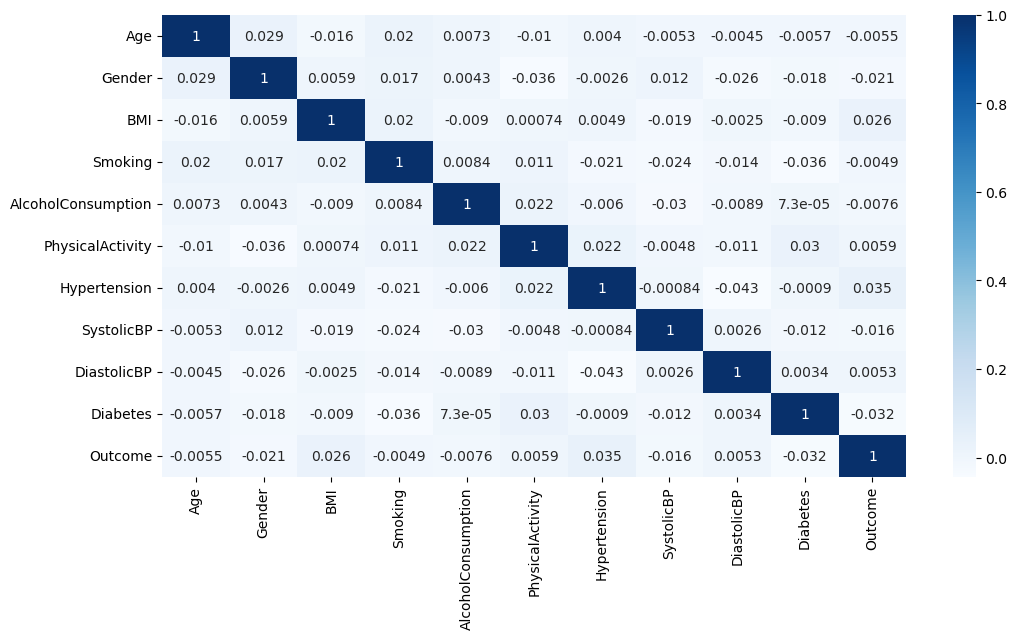

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [107]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
classifier = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)

In [83]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [84]:
print(accuracy)

0.6217054263565891


In [75]:
results_df

,Model,Accuracy
0,Logistic Regression,0.621705
1,Random Forest,0.600000
2,SVM,0.621705
3,KNN,0.558140
4,Naive Bayes,0.621705


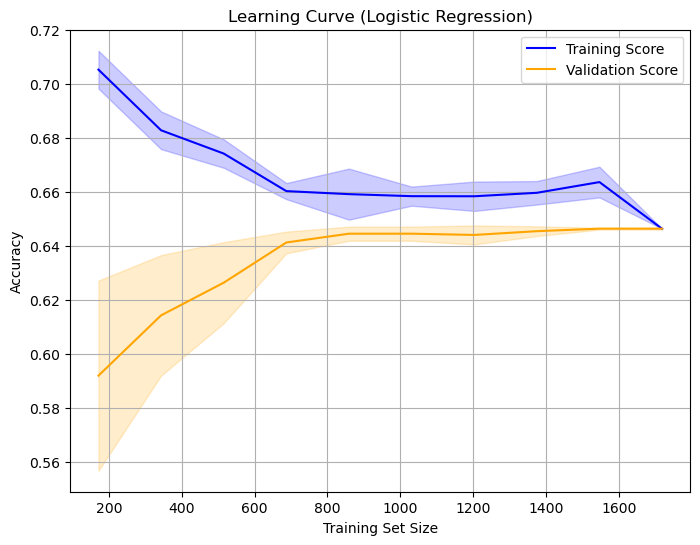

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Example: Logistic Regression
model = LogisticRegression(max_iter=1000, penalty="l2")

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Mean & std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="orange")

# Fill std deviation
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, color="orange", alpha=0.2)

plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


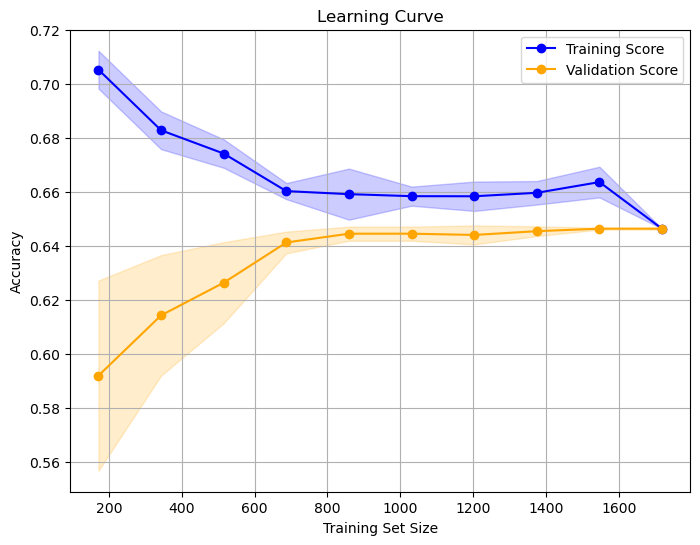

Final Training Accuracy: 0.6463059918557301
Final Validation Accuracy: 0.6463468314631104


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Example: Logistic Regression
model = LogisticRegression(max_iter=1000, penalty="l2")

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean & std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Score", color="orange", marker="o")

# Fill standard deviation areas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Print final accuracies for interpretation
print("Final Training Accuracy:", train_mean[-1])
print("Final Validation Accuracy:", val_mean[-1])


In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [108]:
##### Changing of model as a result of poor performance and overfitting

In [109]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Train a model (Random Forest for example)
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [110]:
accuracy = accuracy_score(y_test, y_pred)

In [111]:
print(accuracy)

0.6636690647482014


In [113]:
import pickle

pickle.dump(model, open('alzheimers_disease.pkl', 'wb'))
